In [1]:
!pip install numpy pandas matplotlib seaborn plotly opendatasets --quiet

In [2]:
import opendatasets as od
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
raw_df = pd.read_excel('/content/cardio_train.xlsx')

In [4]:
raw_df

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
3          0     0       1       1  
4          0     0       0       0  
...      ...   ...     ...     ...  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0  

[70000 rows x 13 columns]

In [5]:
#Since the age is in days , we converted it into its apporomately years
raw_df['age'] = raw_df['age'].apply(lambda x: int(x/365))
raw_df['age']

0        50
1        55
2        51
3        48
4        47
         ..
69995    52
69996    61
69997    52
69998    61
69999    56
Name: age, Length: 70000, dtype: int64

In [6]:
raw_df.head()

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0   50       2     168    62.0    110     80            1     1      0   
1   1   55       1     156    85.0    140     90            3     1      0   
2   2   51       1     165    64.0    130     70            3     1      0   
3   3   48       2     169    82.0    150    100            1     1      0   
4   4   47       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [7]:
# getting some info about the data
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [8]:
# checking for missing values
raw_df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [9]:
raw_df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [10]:
# statistical measures about the data
raw_df.describe()

id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900     52.840671      1.349571    164.359229     74.205690   
std    28851.302323      6.766774      0.476838      8.210126     14.395757   
min        0.000000     29.000000      1.000000     55.000000     10.000000   
25%    25006.750000     48.000000      1.000000    159.000000     65.000000   
50%    50001.500000     53.000000      1.000000    165.000000     72.000000   
75%    74889.250000     58.000000      2.000000    170.000000     82.000000   
max    99999.000000     64.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250      0.572270      0.283484   
min     -150.000000    -70.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max    16020.000000  11000.000000      3.000000      3.000000      1.000000   

               alco        active        cardio  
count  70000.000000  70000.000000  70000.000000  
mean       0.053771      0.803729      0.499700  
std        0.225568      0.397179      0.500003  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      0.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

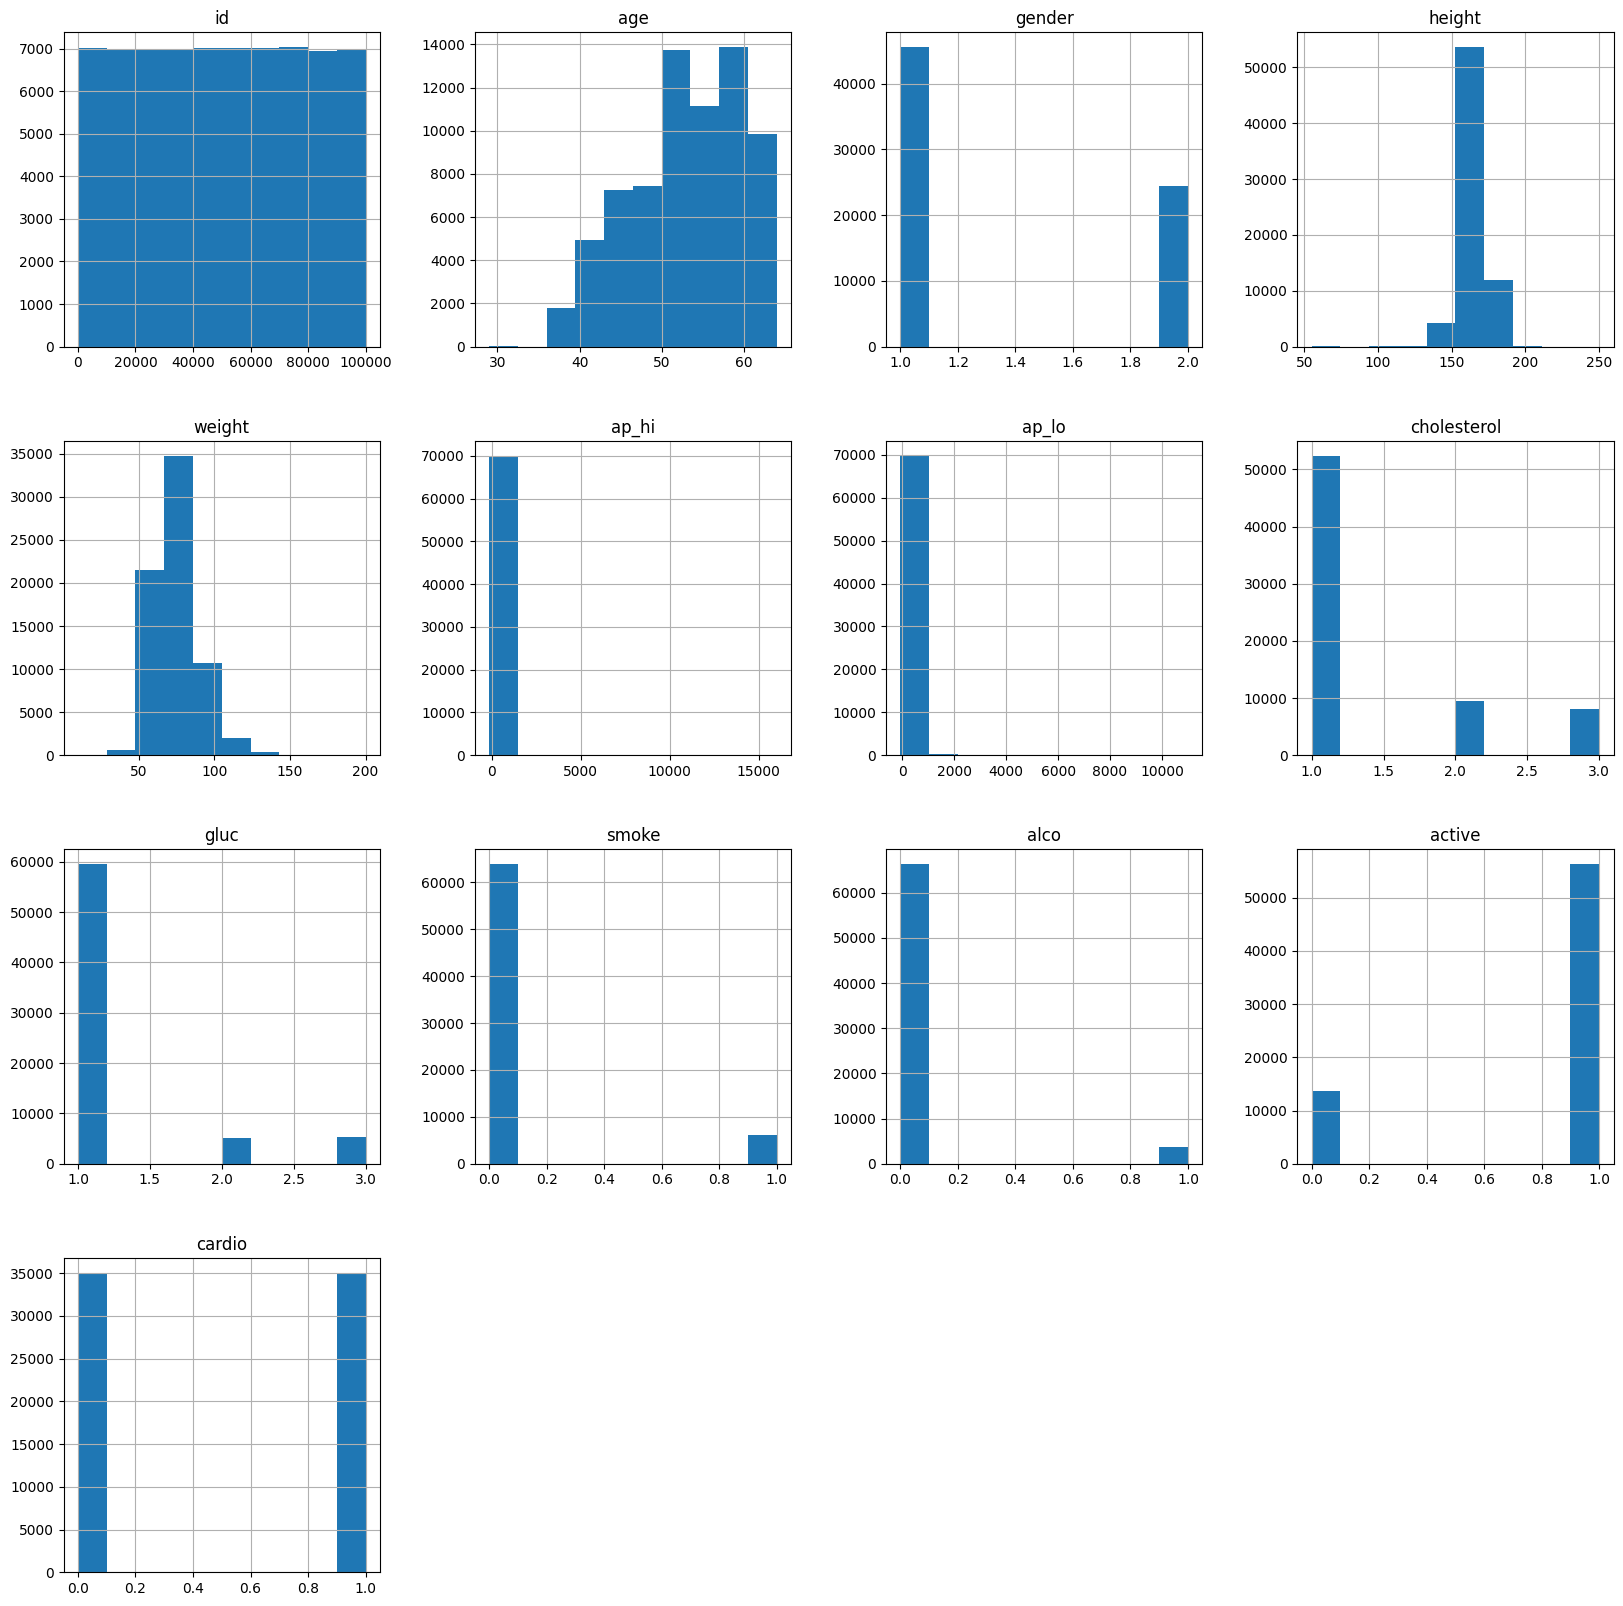

In [12]:
#Let us see the relation between each features distribution with the help of histogram.
import matplotlib.pyplot as plt

raw_df.hist(figsize=(20,20))
plt.savefig('featuresplot')

In [13]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [15]:
#minimum age is 29 and maximum age is 64
fig = px.histogram(raw_df,
                   x='age',
                   marginal='violin',
                   nbins=37,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [16]:
fig = px.histogram(raw_df,
                   x='age',
                   marginal='violin',
                   nbins=37,
                   color = 'cardio',
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [17]:
#Distribution of two genders in the dataset\
px.histogram(raw_df, x=raw_df['gender'].apply(lambda x: 'Female' if(x==1) else 'Male'), #color = 'cardio',
             title = 'Distribution of the two genders.',
             nbins = 3,
             )

In [18]:
px.histogram(raw_df, x=raw_df['gender'].apply(lambda x: 'Female' if(x==1) else 'Male'), color = 'cardio',
             title = 'Distribution of cardio disease btw the two genders.',
             nbins = 3,
             )

In [19]:
fig = px.histogram(raw_df,
                   x='weight',
                   marginal='violin',
                   nbins=37,
                   color = 'cardio',
                   title='Distribution of Weight')
fig.update_layout(bargap=0.1)
fig.show()

In [40]:
px.scatter(raw_df,
           title='Systolic BP VS Diastolic BP',
           x='ap_hi',
           y='ap_lo',
           color='cardio')

In [21]:
px.scatter(raw_df,
           title='weight vs height',
           x='weight',
           y='height',
           color='cardio')

(13.5, -0.5)

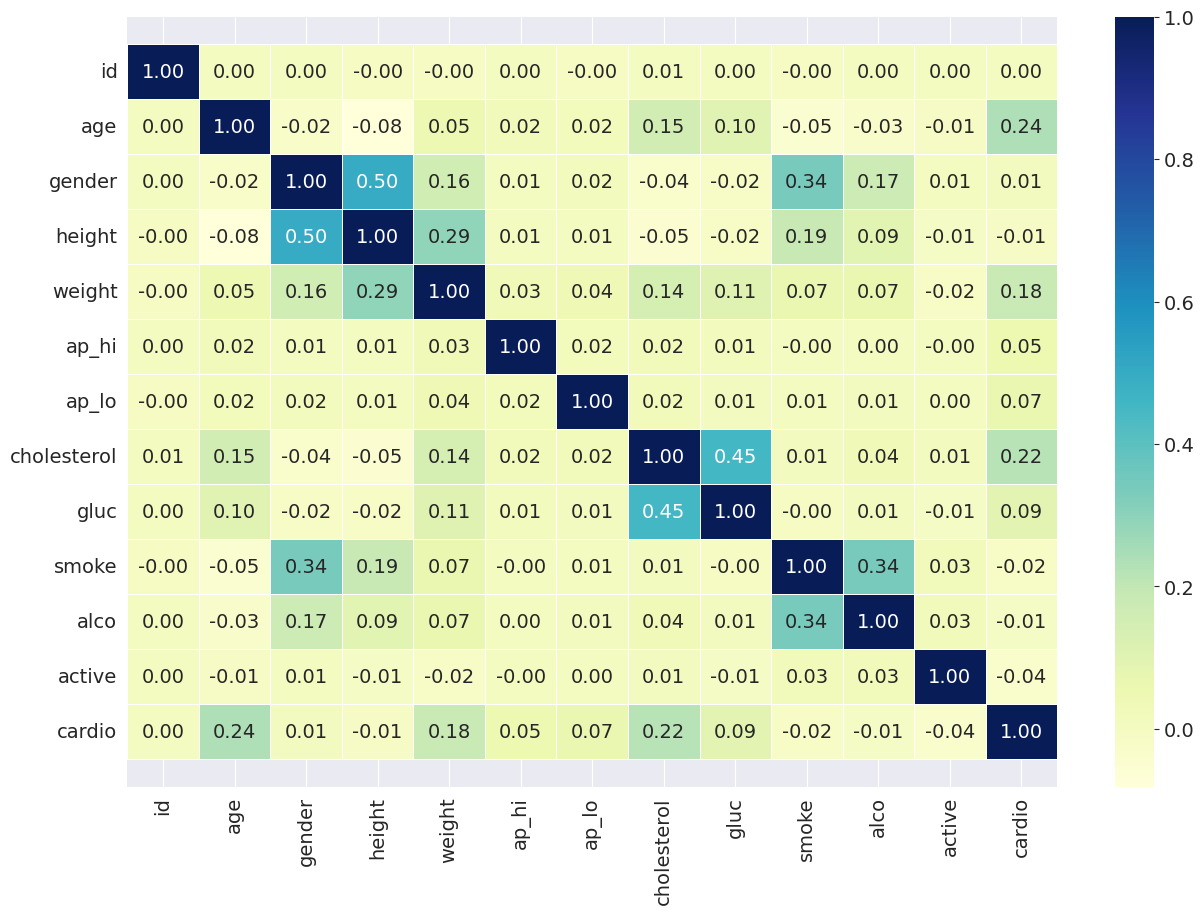

In [22]:

#Visualise correlation
corr_matrix = raw_df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top-0.5)

In [23]:
#Splitting the Features and Target
X = raw_df.drop(columns='cardio', axis=1)
Y = raw_df['cardio']

In [24]:
print(X)

          id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0   50       2     168    62.0    110     80            1     1   
1          1   55       1     156    85.0    140     90            3     1   
2          2   51       1     165    64.0    130     70            3     1   
3          3   48       2     169    82.0    150    100            1     1   
4          4   47       1     156    56.0    100     60            1     1   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993   52       2     168    76.0    120     80            1     1   
69996  99995   61       1     158   126.0    140     90            2     2   
69997  99996   52       2     183   105.0    180     90            3     1   
69998  99998   61       1     163    72.0    135     80            1     2   
69999  99999   56       1     170    72.0    120     80            2     1   

       smoke  alco  active  
0          0     0       1  
1    

In [25]:
print(Y)

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(70000, 12) (56000, 12) (14000, 12)


model training

logistic regression


In [28]:
model = LogisticRegression()

In [29]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

LogisticRegression()

accuracy score

In [30]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [31]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.6951607142857142


In [32]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [33]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.6935714285714286


Training Accuracy for Logistic Regression: 0.6951607142857142
Training Sensitivity for Logistic Regression: 0.6829945165173198
Training Specificity for Logistic Regression: 0.709106239460371
Training Precision for Logistic Regression: 0.7290930506478209


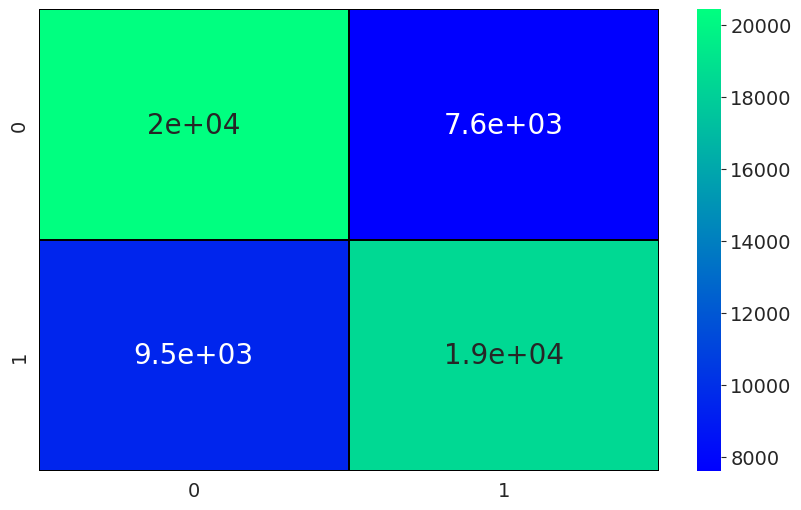

In [34]:
#Confusion matrix for Training Data
cm=confusion_matrix(Y_train,X_train_prediction )
cm
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Training Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Training Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Training Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Training Precision for Logistic Regression:',(TP/(TP+FP)))

Testing Accuracy for Logistic Regression: 0.6935714285714286
Testing Sensitivity for Logistic Regression: 0.6820987654320988
Testing Specificity for Logistic Regression: 0.7066279780085523
Testing Precision for Logistic Regression: 0.7257281553398058


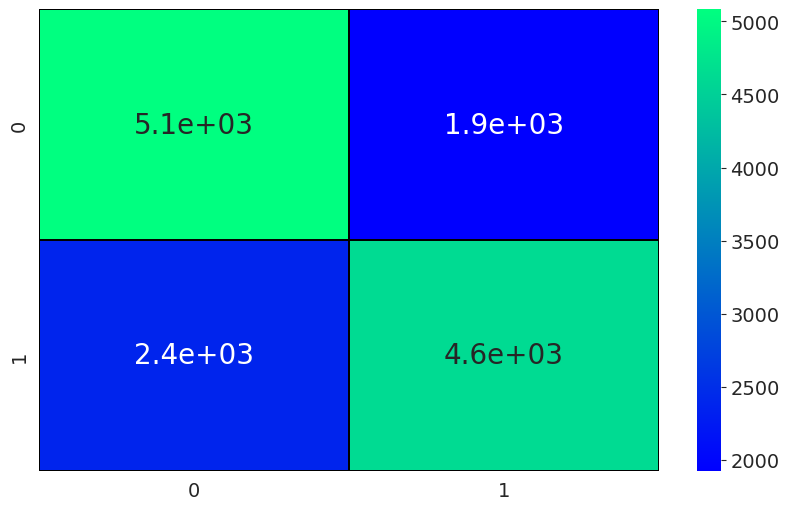

In [35]:
#Confusion matrix for Testing Data
cm=confusion_matrix(Y_test,X_test_prediction )
cm
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

In [36]:
print(classification_report(Y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70      7004
           1       0.71      0.66      0.68      6996

    accuracy                           0.69     14000
   macro avg       0.69      0.69      0.69     14000
weighted avg       0.69      0.69      0.69     14000



In [39]:
input=(17482,1,154,68,100,70,1,1,0,0,0,0)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=model.predict(input_reshaped)
if(pre1==1):
  print("The patient seems to be have heart disease:")
else:
  print("The patient seems to be Normal:")

The patient seems to be have heart disease:


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

